<a href="https://colab.research.google.com/github/Rajithaponduru/VITBML_EDA1/blob/master/Unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
X_test=pd.read_csv("/content/samsung_test.txt")
Y_test=pd.read_csv("/content/samsung_test_labels (1).txt").astype(int)
X_train=pd.read_csv("/content/samsung_train.txt")
Y_train=pd.read_csv("/content/samsung_train_labels.txt").astype(int)
print(X_train,Y_test,Y_train,X_test)

In [0]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

RANDOM_STATE = 17

In [0]:
PATH_TO_SAMSUNG_DATA = "../input"





DIMENSIONS 

In [0]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(350, 1)
(7351, 1)
(583, 1)
(2946, 1)


In [0]:
# Checking dimensions
assert(X_train.shape == (7351, 1) and y_train.shape == (7351,1))
assert(X_test.shape == (2946, 1) and y_test.shape == (2946,1))

# Merging X_train and X_test and Y_train ,Y_test

In [0]:
X_combined=np.r_[X_train,X_test]
Y_combined=np.r_[Y_train,Y_test]
print(X_combined,Y_combined)

In [0]:
X=pd.concat([X_train,X_test],axis=0)
X

In [0]:
y=pd.concat([Y_train,Y_test],axis=0)
y

In [0]:
np.unique(y)


array([1, 2, 3, 4, 5, 6])

In [0]:
n_classes=np.unique(y).size
n_classes

6

# Principal **Component** Analaysis(PCA)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
from sklearn.decomposition import PCA
pca_data = PCA(n_components=2)
principalComponents_data = pca.fit_transform(X_std)



In [0]:
print(pca.components_)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


In [0]:
principalDf = pd.DataFrame(data = principalComponents_data
                           ,columns = ['principal component 1', 'principal component 2'])
principalDf.tail()




,principal component 1,principal component 2
195,-1.327738,-0.053903
196,-0.224926,-0.254327
197,-3.098237,-0.201585
198,1.861588,0.098387
199,-0.374870,-0.251901


In [0]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.94469498 0.05530502]


In [0]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


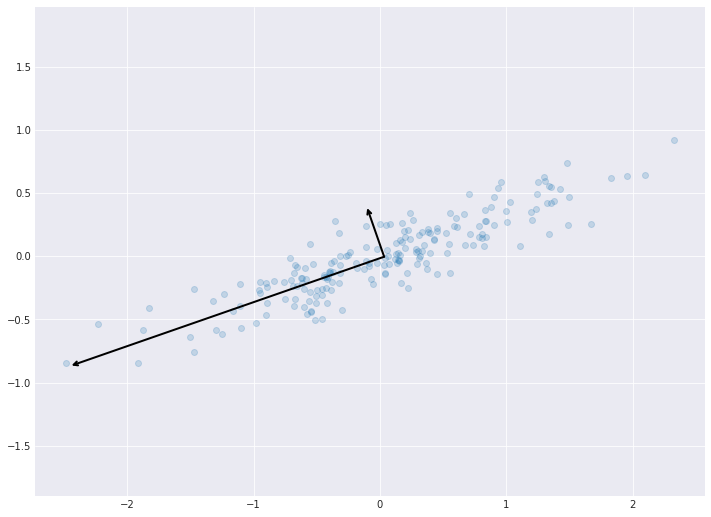

In [0]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [0]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 2)


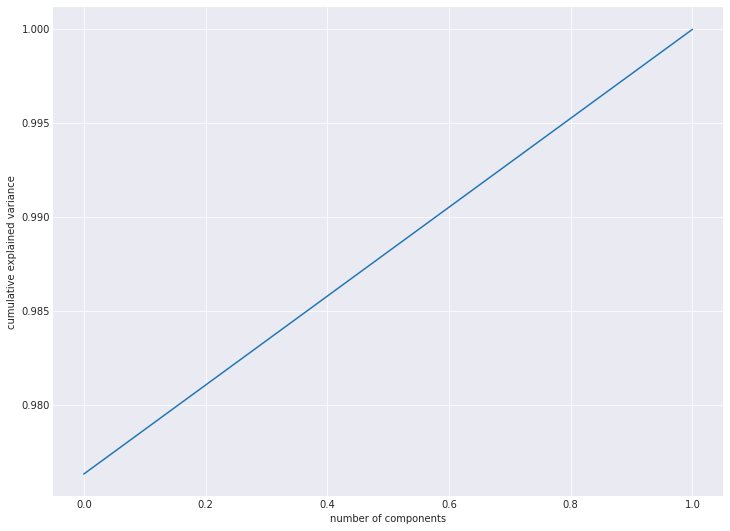

In [0]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


# ***silhouette***

In [0]:

from sklearn.cluster import KMeans
from sklearn import metrics
k_means = KMeans(n_clusters=6)
model = k_means.fit(X)
model
y_hat = k_means.predict(X)
labels = k_means.labels_
metrics.silhouette_score(X, labels, metric = 'euclidean')


0.690263885675279

## Tuning hyperparameter for linearsvc using Gridsearchcv*

In [0]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
logreg = LogisticRegression()
param_grid = {'C':[0.001,0.01,0.1,1,5,10,20,50,100]}

clf = GridSearchCV(logreg,
                    param_grid=param_grid,
                    cv=3,
                    n_jobs=-1)

clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)




In [0]:
svc = LinearSVC(random_state=RANDOM_STATE)
svc_params = {'C': [0.001, 0.01, 0.1, 1, 10]}